In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

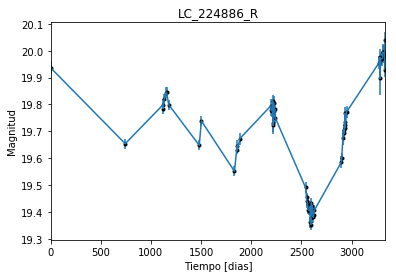

In [2]:
data = np.genfromtxt('LC_224886_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_224886_R')
plt.savefig("LC_224886_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

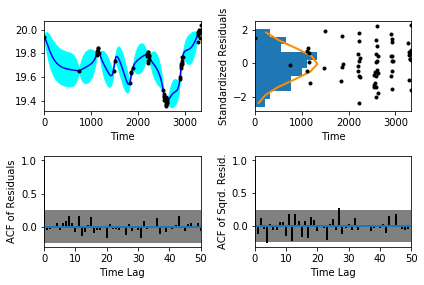

In [5]:
sample.assess_fit()

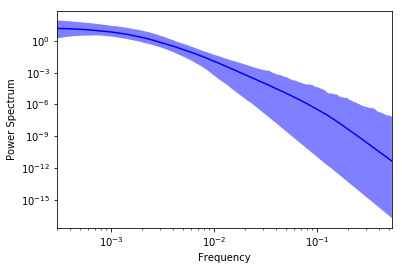

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

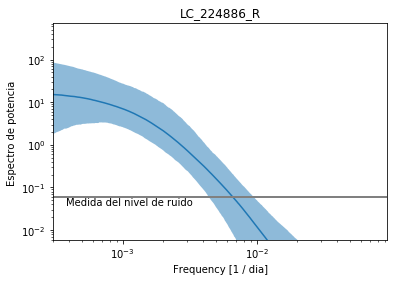

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_224886_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_224886_R')

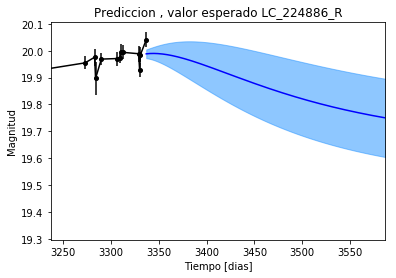

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_224886_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_224886_R')

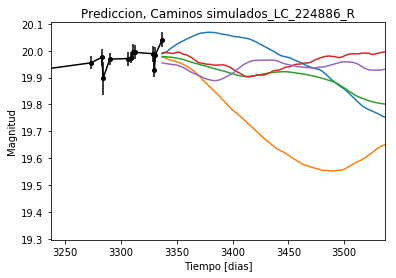

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_224886_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


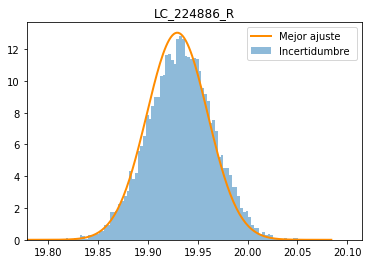

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_224886_R')
plt.savefig("Mejor_ajuste_LC_224886_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_224886_R')

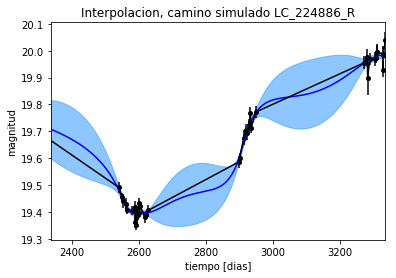

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_224886_R')

Text(0.5,1,'Interpolacion, camino simulado LC_224886_R')

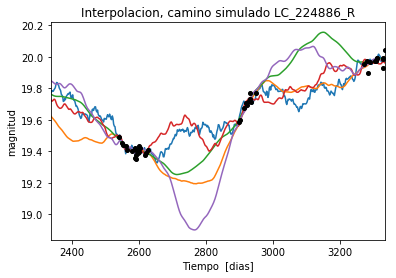

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_224886_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 448.544614749
Median: 0.0121363743751
Standard deviation: 0.20039349635
68% credibility interval: [ 0.00115779  0.20001591]
95% credibility interval: [  3.91048949e-04   7.98684236e-01]
99% credibility interval: [  3.26557132e-04   1.01257618e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 4792.14198721
Median: 0.0022990340388
Standard deviation: 0.0643766335692
68% credibility interval: [ 0.00057928  0.02189654]
95% credibility interval: [ 0.00033276  0.19545202]
99% credibility interval: [  3.07486410e-04   4.63433662e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 513.768975493
Median: 0.00920670497167
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 764.832159718
Median: 142.610883415
Standard deviation: 1.69130378288
68% credibility interval: [ 140.73277987  143.81276852]
95% credibility interval: [ 138.11686025  144.64160655]
99% credibility interval: [ 136.12222134  145.25242325]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 524.147162448
Median: 0.562051507294
Standard deviation: 1.97753934178
68% credibility interval: [ 0.06793218  3.31613906]
95% credibility interval: [ 0.01918521  6.777389  ]
99% credibility interval: [ 0.01195498  9.51923316]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 2554.50141226
Median: 0.246534134702
Standard deviation: 8.25152675226
68% credibility interval: [ 0.01093019  5.69948212]
95% credibility interval: [  1.04959620e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2882.13678562
Median: 5.86049476319e-19
Standard deviation: 1.55722656828e+59
68% credibility interval: [  5.90951130e-72   1.33883030e+01]
95% credibility interval: [  1.82320582e-96   3.22497190e+40]
99% credibility interval: [  1.57355477e-105   3.76624018e+045]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2279.98295036
Median: 19.729344559
Standard deviation: 0.0955370992135
68% credibility interval: [ 19.65956592  19.81830608]
95% credibility interval: [ 19.5629474   19.94238744]
99% credibility interval: [ 19.46148097  20.0710546 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 2386.63382418
Median: 0.00271871423726
Standard deviation: 0.235198975585
68% credibility interval: [ 0.          0.25771039]
95% credibility interval: [ 0.          0.90080382]
99% credibility interval: [ 0.         1.0369164]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 2386.63382418
Median: 0.00271871423726
Standard deviation: 0.235198975585
68% credibility interval: [ 0.          0.25771039]
95% credibility interval: [ 0.          0.90080382]
99% credibility interval: [ 0.         1.0369164]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 453.135855437
Median: 0.0
Standard deviation: 0.000534066987878
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 764.832159718
Median: 142.610883415
Standard deviation: 1.69130378288
68% credibility interval: [ 140.73277987  143.81276852]
95% credibility interval: [ 138.11686025  144.64160655]
99% credibility interval: [ 136.12222134  145.25242325]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1580.49802062
Median: 0.0417824919177
Standard deviation: 0.0458174618756
68% credibility interval: [ 0.02553328  0.07704313]
95% credibility interval: [ 0.01664696  0.16217818]
99% credibility interval: [ 0.01226153  0.27430865]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2386.55360881
Median: 1.10592798769
Standard deviation: 0.171489831258
68% credibility interval: [ 0.95603389  1.29155713]
95% credibility interval: [ 0.82656854  1.49183382]
99% credibility interval: [ 0.75807986  1.64306575]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1776.27557057
Median: 0.000103126285177
Standard deviation: 0.0224331567482
68% credibility interval: [  2.95949424e-07   2.79501300e-03]
95% credibility interval: [  6.98988329e-45   2.22560589e-02]
99% credibility interval: [  6.72908559e-50   5.81308299e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 448.544614749
Median: (-0.076255089156-0.927904980703j)
Standard deviation: 1.94145455802
68% credibility interval: [-1.25673706-3.94575892j -0.00727460-0.00943909j]
95% credibility interval: [ -5.01828106e+00+0.j          -2.45703301e-03-0.00309079j]
99% credibility interval: [ -6.36220379e+00+0.j          -2.05181897e-03-0.43860651j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 4792.14198721
Median: (-0.0144452568933+0.311692430222j)
Standard deviation: 1.53215585241
68% credibility interval: [-0.13758000+1.46493791j -0.00363973+0.j        ]
95% credibility interval: [-1.22806126+2.80238132j -0.00209080+1.57204103j]
99% credibility interval: [ -2.91183958e+00+3.80756587j  -1.93199409e-03+1.32435506j]
Posterior sum